In [ ]:
##word enbedding with neural networks, 


# GloVe Algorithm

There are many embedding techniques available, and in this case, we will use the GloVe algorithm.

In the GloVe (Global Vectors for Word Representation) algorithm (Pennington et al., 2014), words are represented as vectors in a high-dimensional space. The distances between these vectors reflect the semantic relationships between words. The fundamental idea is that words appearing in similar contexts will have similar vector representations. This similarity can be quantified using distances between word embeddings, such as Euclidean distance or cosine similarity, to assess the relatedness of different words in meaning.

## Mathematical Formulation

GloVe builds a co-occurrence matrix $X$, where each entry $X_{ij}$ represents how often word $i$ appears in the context of word $j$. This matrix captures the frequency with which words co-occur within a defined context window.

GloVe assumes that the probability of observing word $j$ in the context of word $i$ is related to their embeddings. Specifically, the probability is given by:
   $
   P_{ij} = \frac{X_{ij}}{\sum_k X_{ik}}
   $
   where $P_{ij}$ is the probability of word $j$ given word $i$, and $X_{ik}$ is the total count of word $i$ appearing in any context.

The goal is to find word embeddings $ \mathbf{v}_i $ and $ \mathbf{v}_j $ such that the following objective function is minimized:
   $
   J = \sum_{i,j} f(X_{ij}) \left( \mathbf{v}_i^\top \mathbf{v}_j + b_i + b_j - \log X_{ij} \right)^2
   $
   Here, $f(X_{ij})$ is a weighting function to handle rare words, $b_i$ and $b_j$ are bias terms for words $i$ and $j$, and $\mathbf{v}_i^\top \mathbf{v}_j$ is the dot product of the embeddings for words $i$ and $j$.

GloVe considers a context window of a fixed size around a target word. For example, if the context window size is five, the algorithm examines the words appearing within five positions before and after the target word.

By analyzing co-occurrence statistics within these context windows, GloVe learns word embeddings that capture semantic relationships. Words with similar contexts will have similar embeddings, allowing us to compute and interpret distances between vectors to understand semantic similarity.

###### Pennington, J., Socher, R., & Manning, C. D. (2014). GloVe: Global Vectors for Word Representation. *Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP)*, 1532–1543.


In [1]:
import torch 
import torchtext.vocab as vocab
import pandas as pd
from plotnine import ggplot, aes, geom_text, labs
from sklearn.manifold import TSNE

/home/hernan/.local/lib/python3.10/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/hernan/.local/lib/python3.10/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)


# GloVe Models 
The GloVealgorithm offers several pre-trained models, each trained on different datasets and with varying dimensions. Below is an overview of the available models:

#### Models and Dimensions

1. **GloVe 6B**:
   - **Dataset**: Trained on a 6 billion token corpus.
   - **Available Dimensions**:
     - **50-dimensional**: `glove6b_50d` (for smaller-scale experiments)
     - **100-dimensional**: `glove6b_100d` (a common choice for many applications)
     - **200-dimensional**: `glove6b_200d` (captures more semantic nuance)
     - **300-dimensional**: `glove6b_300d` (provides the most detailed representations in this model)
   - **Usage**: Suitable for applications requiring embeddings with various levels of detail and computational resources.

2. **GloVe 42B**:
   - **Dataset**: Trained on a 42 billion token corpus.
   - **Dimensions**:
     - **300-dimensional**: `glove42b_300d` (offers detailed word representations with extensive contextual information)
   - **Usage**: Ideal for tasks requiring high-quality embeddings from a large corpus.

3. **GloVe 840B**:
   - **Dataset**: Trained on an 840 billion token corpus.
   - **Dimensions**:
     - **300-dimensional**: (provides very high-quality embeddings based on an extremely large dataset)
   - **Usage**: Best suited for applications needing the highest quality word vectors, leveraging a vast corpus for rich semantic understanding.

4. **GloVe Twitter 27B**:
   - **Dataset**: Trained on 27 billion tokens from Twitter.
   - **Available Dimensions**:
     - **25-dimensional**: `glove-twitter-25d` (smaller vectors suitable for lightweight applications)
     - **50-dimensional**: `glove-twitter-50d` (a good trade-off between detail and computational efficiency)
     - **100-dimensional**: `glove-twitter-100d` (provides a balance of detail and performance)
     - **200-dimensional**: `glove-twitter-200d` (captures more detailed semantic relationships)
   - **Usage**: Tailored for social media text and informal language.


To load a specific GloVe model, we use the `vocab` module from the the `torchtext` library.



In [ ]:
names = ["6b","42B", "840B","twitter.27B"]
dim = [50,100,200,300] ## 50d, 100d, 200d, & 300d vectors for 6B, 300d vectors for 42B & 840B, and finally 25d, 50d, 100d, & 200d vectors for twitter.27B


glove6b_100d = vocab.GloVe(name="6B",dim=100)
glove6b_300d = vocab.GloVe(name="6B",dim=300)
glove42b = vocab.GloVe(name="42B",dim=300)



In [85]:
### the documentation of 
dir(glove6b_100d)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cache',
 'dim',
 'get_vecs_by_tokens',
 'itos',
 'stoi',
 'unk_init',
 'url',
 'vectors']

### Custom GloVe-Specific Attributes
These are the important ones that provide access to the actual GloVe functionality. 
We'll use:



**`stoi`**: This stands for "string to index." It's a dictionary that maps a word to its index in the embedding matrix. For example, stoi['the'] might return 0.

**`vectors`**: A matrix containing the word embeddings. The rows correspond to the words, and each row is the vector for a particular word


In [87]:

### the word "woman" is the index
glove6b_100d.stoi["woman"]

787

In [97]:
### the "vectors" embeddnig of the index of the word "woman"
glove6b_100d.vectors[glove6b_100d.stoi["woman"]]

tensor([ 0.5937,  0.4482,  0.5932,  0.0741,  0.1114,  1.2793,  0.1666,  0.2407,
         0.3905,  0.3277, -0.7503,  0.3501,  0.7606,  0.3807,  0.1752,  0.0318,
         0.4685, -0.2165, -0.4628,  0.3997,  0.1662, -0.0115,  0.0441,  0.3033,
         0.6153,  0.4705, -0.4404, -1.5963,  0.1843,  0.2319,  0.2045,  0.5162,
         0.6573, -0.3452,  0.2345, -0.6200, -0.6874,  0.2858,  1.0605,  0.4692,
        -0.8515,  0.1015,  0.2143, -0.2059,  0.2364,  0.2132, -0.2129,  0.1211,
         0.1877, -0.2328, -0.2550, -0.3963,  0.8438,  1.6801, -0.4094, -1.9976,
        -0.6987,  0.2173,  1.2197,  0.5513,  0.4410,  0.7259, -0.0921, -0.0224,
         0.7204,  0.1076,  0.8412,  0.3031, -0.4254,  0.0564,  0.1311, -0.0712,
        -0.1058,  0.5668,  0.5455,  0.8411,  0.1486, -0.6263, -0.6839, -1.0831,
        -0.0884,  0.3217,  0.4779,  0.0919, -1.2559, -1.2268,  0.0854,  0.3683,
         0.0816, -0.7661,  0.8775, -0.2201,  0.8240, -0.0922, -0.4594,  0.4657,
        -0.5602, -0.5465,  0.1516, -0.30

In [4]:
def get_embedding_vector(glove,word):
    word_index = glove.stoi[word]
    emb = glove.vectors[word_index]
    return emb
    

In [90]:
get_embedding_vector(glove6b_100d,"woman")

tensor([ 0.5937,  0.4482,  0.5932,  0.0741,  0.1114,  1.2793,  0.1666,  0.2407,
         0.3905,  0.3277, -0.7503,  0.3501,  0.7606,  0.3807,  0.1752,  0.0318,
         0.4685, -0.2165, -0.4628,  0.3997,  0.1662, -0.0115,  0.0441,  0.3033,
         0.6153,  0.4705, -0.4404, -1.5963,  0.1843,  0.2319,  0.2045,  0.5162,
         0.6573, -0.3452,  0.2345, -0.6200, -0.6874,  0.2858,  1.0605,  0.4692,
        -0.8515,  0.1015,  0.2143, -0.2059,  0.2364,  0.2132, -0.2129,  0.1211,
         0.1877, -0.2328, -0.2550, -0.3963,  0.8438,  1.6801, -0.4094, -1.9976,
        -0.6987,  0.2173,  1.2197,  0.5513,  0.4410,  0.7259, -0.0921, -0.0224,
         0.7204,  0.1076,  0.8412,  0.3031, -0.4254,  0.0564,  0.1311, -0.0712,
        -0.1058,  0.5668,  0.5455,  0.8411,  0.1486, -0.6263, -0.6839, -1.0831,
        -0.0884,  0.3217,  0.4779,  0.0919, -1.2559, -1.2268,  0.0854,  0.3683,
         0.0816, -0.7661,  0.8775, -0.2201,  0.8240, -0.0922, -0.4594,  0.4657,
        -0.5602, -0.5465,  0.1516, -0.30

In the GloVe algorithm, the relationship between words is represented by the distance between their embeddings. To form clusters of similar words, the Euclidean distance (p=2) can be computed using the torch.dist() function from the PyTorch library. This distance quantifies how similar two words are based on their vector representations.

In [93]:
def get_closest_words_from_word(glove,word, max_n):
    word_emb = get_embedding_vector(glove,word)
    distances = [(w, torch.dist(word_emb, get_embedding_vector(glove,w),p=2).cpu().item()) for w in glove.itos]
    dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
    return [item[0] for item in dist_sort_filt]

    
    


In [95]:
get_closest_words_from_word(glove6b_100d,"music",20)

['music',
 'musical',
 'dance',
 'songs',
 'pop',
 'recording',
 'folk',
 'jazz',
 'concert',
 'musicians',
 'contemporary',
 'artists',
 'soundtrack',
 'hop',
 'studio',
 'song',
 'tunes',
 'singing',
 'band',
 'performing']

The following code defines functions to perform word analogy tasks using word embeddings. First, it calculates distances between a given embedding and all other embeddings to find the closest words. Then, it applies an analogy formula to find a word that fits a specified relationship. Finally, the code uses these functions to identify words that complete the analogy "sister is to brother as nephew is to ?" by retrieving the top 10 closest words to the resulting vector.

In [99]:
def get_closest_words_from_embedding(glove,word_emb, max_n):
    distances = [(w, torch.dist(word_emb, get_embedding_vector(glove,w)).cpu().item()) for w in glove.itos]
    dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
    return dist_sort_filt
def get_word_analogy(glove,word1, word2, word3, max_n):
    # logic w1= king, ...
    # w1 - w2 + w3 --> w4
    word1_emb = get_embedding_vector(glove,word1)
    word2_emb = get_embedding_vector(glove,word2)
    word3_emb = get_embedding_vector(glove,word3)
    word4_emb = word1_emb - word2_emb + word3_emb
    analogy = get_closest_words_from_embedding(glove,word4_emb,max_n)
    return analogy

get_word_analogy(glove6b_100d,word1='sister', word2='brother', word3='nephew',max_n=10)


[('sister', 2.5398471355438232),
 ('niece', 2.700707197189331),
 ('granddaughter', 3.272900342941284),
 ('sister-in-law', 3.652935743331909),
 ('cousin', 3.657327651977539),
 ('aunt', 3.7071921825408936),
 ('daughter-in-law', 3.864732503890991),
 ('daughter', 3.8866991996765137),
 ('nephew', 3.9346508979797363),
 ('daughters', 3.9362165927886963)]

In the next part of the code, the focus shifts to creating word clusters based on categories. The code generates word clusters by iterating over predefined categories and finding the top **$n$** closest words to each category using GloVe embeddings. Then it creates a DataFrame to store these clusters, where each entry includes the category and associated words.

In [54]:
## Word Clusters

words = []
categories = ['numbers', 'algebra', 'music', 'science', 'technology']

df_word_cloud = pd.DataFrame({
    "category": [],
    "word": []
})


for category in categories:
    print(category)
    closest_words = get_closest_words_from_word(glove6b_100d,word=category, max_n=100)
    temp = pd.DataFrame({
        'category': [category] * len(closest_words),
        'word': closest_words
    })
    df_word_cloud = pd.concat([df_word_cloud, temp], ignore_index=True)

numbers
algebra
music
science
technology


In [55]:
df_word_cloud

,category,word
0,numbers,numbers
1,numbers,number
2,numbers,instance
3,numbers,moreover
4,numbers,though
...,...,...
495,technology,useful
496,technology,application
497,technology,recently
498,technology,instance


now we need to represent this words,The following code prepares to visualize the words from the df_word_cloud. It initializes a tensor to hold the word embeddings and a list to store the word labels.


In [ ]:
glove_dim  = 100
n_rows = df_word_cloud.shape[0]
n_cols = glove_dim
X = torch.empty((n_rows, n_cols))
words_labels= []
for i in range(n_rows):
    current_word = df_word_cloud.loc[i, 'word']
    X[i, :] = get_embedding_vector(glove6b_100d,current_word)
    words_labels.append(current_word) 
    print(f"{i}: {current_word}")
# %%


The following code visualizes the word embeddings from the df_word_cloud DataFrame. It first reduces the dimensionality of the embeddings to 2D using t-SNE, which helps in plotting the high-dimensional GloVe vectors in a 2D space

In [122]:
tsne_model = TSNE(n_components=2, perplexity=25, learning_rate=0.05, random_state=10)
X_tsne = tsne_model.fit_transform(X.cpu().numpy())
# %%
df_word_cloud['x'] = X_tsne[:, 0]
df_word_cloud['y'] = X_tsne[:, 1]


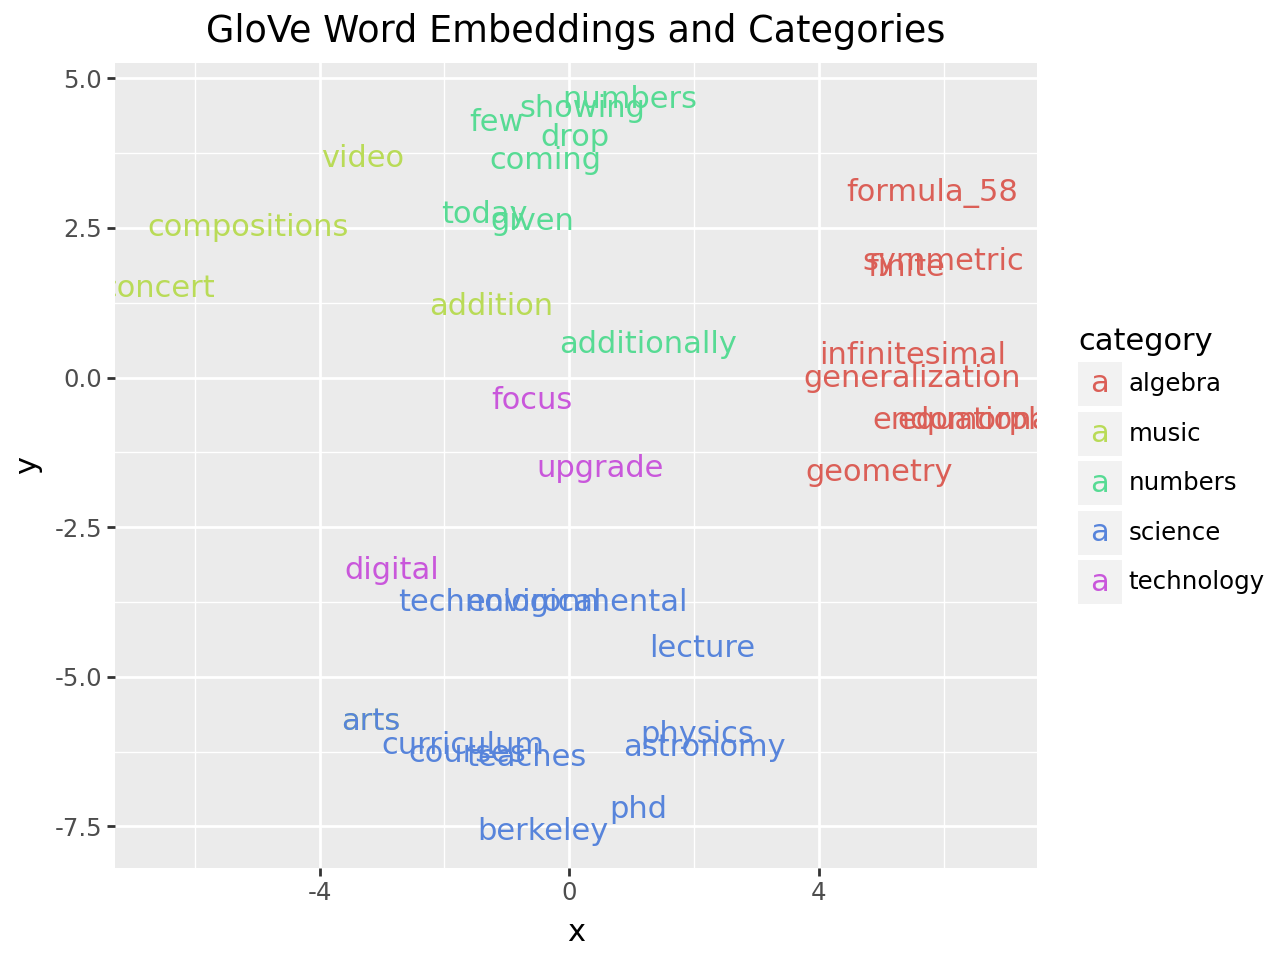

In [123]:
# with ggplot


ggplot(data=df_word_cloud.sample(35)) + aes(x = 'x', y='y', label = 'word', color = 'category') + geom_text() + labs(title='GloVe Word Embeddings and Categories')


Following the NLP pre-trained model, it will be nice to analize data sets to identify patter by

In [124]:
from tqdm import tqdm


In [125]:
### Sentiment analysis 
import numpy as np
import pandas as pd
import pickle
from collections import Counter
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sentence_transformers import SentenceTransformer



/home/hernan/.local/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [126]:
#Load the data
df = pd.read_csv("data/Tweets.csv")
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [127]:
## The next part is just the mapping of the categories into numerical values

cat_id = {"neutral":1,
          "negative":0,
          "positive": 2}

df["class"]=df["sentiment"].map(cat_id)

In [128]:
df

,textID,text,selected_text,sentiment,class
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,088c60f138,my boss is bullying me...,bullying me,negative,0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,0
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,0
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,2
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,2


In [129]:
## now we need to work on the embedding process. The model I chosse was from
# https://huggingface.co/sentence-transformers/all-mpnet-base-v2.
# "This is a sentence-transformers model: It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like 
# clustering or semantic search."

emb_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')


/home/hernan/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884


In [130]:
sentences = ["How is this working together?"]

embeddings = emb_model.encode(sentences)
print(embeddings.squeeze().shape,embeddings)

(768,) [[ 6.36698008e-02 -7.60731772e-02  2.95098196e-03  4.36819457e-02
  -6.91066682e-02  5.80112897e-02  8.60885810e-03 -3.19974013e-02
  -4.49120514e-02 -2.82861385e-02 -3.25297415e-02  4.07058932e-02
   1.01843506e-01  5.36248721e-02  3.46165337e-02 -3.76363881e-02
  -1.10083017e-02  6.39304221e-02 -1.03024200e-01 -1.04824668e-02
   3.59485969e-02 -7.27915112e-03 -2.30274834e-02 -5.98170562e-03
  -4.38562483e-02  1.72224343e-02 -2.20150314e-02  6.27562553e-02
  -3.65425013e-02  5.16343769e-03 -2.53235046e-02  3.14808413e-02
  -2.04691719e-02  1.83532648e-02  1.60897889e-06 -5.24459183e-02
   1.13247866e-02 -1.18055847e-02  4.90628881e-03 -2.78951954e-02
  -1.05216568e-02 -4.13841684e-04  4.72524017e-03  3.63269672e-02
   8.40852689e-03 -3.41305360e-02  1.03869941e-03  2.92701330e-02
   3.80811840e-02  4.36698925e-03 -9.73796565e-03 -4.10522781e-02
   2.65751723e-02  1.36244658e-03  2.32412778e-02 -3.13005112e-02
   3.30924131e-02 -5.64193577e-02  1.06217667e-01 -2.80299354e-02
   

In [131]:
df["text"].values

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype=object)


This line of code takes a list of sentences and converts them into numerical vectors using a pre-trained model, i.e. the `emb_model`. Essentially, it transforms the sentences into embeddings. One can then use these embeddings for various tasks, such as measuring similarity or classification. In this case, I’m encoding Twitter text.

The `embeddings` variable will hold these numerical vectors. If you provide multiple sentences, you’ll get a 2D array (or tensor), where each row represents a sentence's embedding. For a single sentence, it might return a 1D array, depending on the model. I’m also saving these embeddings as `X` for future use, so I don’t have to run the encoding process every time.

In [132]:
X = emb_model.encode(df["text"].values)
with open("data/tweet_X.pkl","wb") as output_file:
    pickle.dump(X,output_file)


In [133]:
with open("data/tweet_X.pkl", "rb") as input_file:
    X = pickle.load(input_file)
##Here I just acceses the embbeding values and stored in y
y = df['class'].values

In [135]:
#some dimentional cheking
X.shape, y.shape

((27481, 768), (27481,))

In [136]:
#Now the training part, for that I split the set as usual


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)


In [137]:
#This SentimentData class is used to manage and process data for sentiment analysis in PyTorch. 
# It stores features and labels as tensors and integrates with PyTorch's DataLoader for efficient 
# data handling during model training and evaluation.


class SentimentData(Dataset):
    def __init__(self, X, y):
        super(SentimentData, self).__init__()
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y).long()
        self.len = len(self.X)

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        return self.X[index], self.y[index]


    

In [138]:
#instanse of the datasets
train_ds = SentimentData(X=X_train,y=y_train)
test_ds = SentimentData(X=X_test,y=y_test)

In [139]:
##Create the data loader
##some hypermarameters that I'll use
BATCH_SIZE = 128
NUM_EPOCHS = 80
MAX_FEATURES = 10

train_loader = DataLoader(dataset=train_ds,batch_size=BATCH_SIZE,shuffle=True)

test_loader  = DataLoader(dataset=test_ds,batch_size=BATCH_SIZE,shuffle=True)


In [140]:
##The model

class SentimentModel(nn.Module):
    def __init__(self, NUM_FEATURES, NUM_CLASSES, HIDDEN = 10):
        super().__init__()
        self.linear = nn.Linear(NUM_FEATURES, HIDDEN)
        self.linear2 = nn.Linear(HIDDEN, NUM_CLASSES)
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.log_softmax(x)
        return x



In [158]:

#%% Model, Loss and Optimizer, and training
model = SentimentModel(NUM_FEATURES = X_train.shape[1], NUM_CLASSES = 3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters())

# %% Model Training
train_losses = []
for e in range(NUM_EPOCHS):
    curr_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred_log = model(X_batch)
        loss = criterion(y_pred_log, y_batch.long())
        
        curr_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_losses.append(curr_loss)
    print(f"Epoch {e}, Loss: {curr_loss}")

Epoch 0, Loss: 108.99900126457214
Epoch 1, Loss: 90.4163150191307
Epoch 2, Loss: 82.6683400273323
Epoch 3, Loss: 79.87826198339462
Epoch 4, Loss: 78.48845422267914
Epoch 5, Loss: 77.39098799228668
Epoch 6, Loss: 76.58788120746613
Epoch 7, Loss: 75.9509996175766
Epoch 8, Loss: 75.28265106678009
Epoch 9, Loss: 74.84801679849625
Epoch 10, Loss: 74.41284054517746
Epoch 11, Loss: 74.08572173118591
Epoch 12, Loss: 73.64636939764023
Epoch 13, Loss: 73.25993835926056
Epoch 14, Loss: 72.87286856770515
Epoch 15, Loss: 72.59383058547974
Epoch 16, Loss: 72.28641420602798
Epoch 17, Loss: 71.95400410890579
Epoch 18, Loss: 71.81923335790634
Epoch 19, Loss: 71.42522948980331
Epoch 20, Loss: 71.08463561534882
Epoch 21, Loss: 70.92311292886734
Epoch 22, Loss: 70.52689316868782
Epoch 23, Loss: 70.32845842838287
Epoch 24, Loss: 70.27489507198334
Epoch 25, Loss: 69.79864978790283
Epoch 26, Loss: 69.71716099977493
Epoch 27, Loss: 69.48838859796524
Epoch 28, Loss: 69.15569776296616
Epoch 29, Loss: 69.0002616

In [153]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Losses')

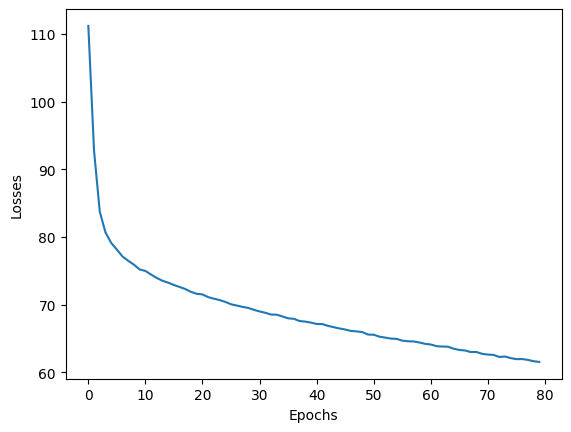

In [155]:
sns.lineplot(x=list(range(len(train_losses))),y=train_losses)
plt.xlabel("Epochs")
plt.ylabel("Losses")

In [144]:
import matplotlib.pyplot as plt

%matplotlib inline


In [145]:
# %% Model Evaluation
all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred_log = model(X_batch)
        y_pred = torch.argmax(y_pred_log, dim=1)
        all_preds.extend(y_pred.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())


In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [159]:
# Set model to evaluation mode
model.eval()

# Initialize lists to store predictions and labels
all_preds = []
all_labels = []

# Inference
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred_log = model(X_batch)
        y_pred = torch.argmax(y_pred_log, dim=1)
        all_preds.extend(y_pred.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
cm = confusion_matrix(all_labels, all_preds)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)


Accuracy: 0.6733134415253621
Precision: 0.6739206045716377
Recall: 0.6733134415253621
F1 Score: 0.673572084298894
Confusion Matrix:
[[2579 1114  187]
 [1000 3566  966]
 [ 260  962 3107]]


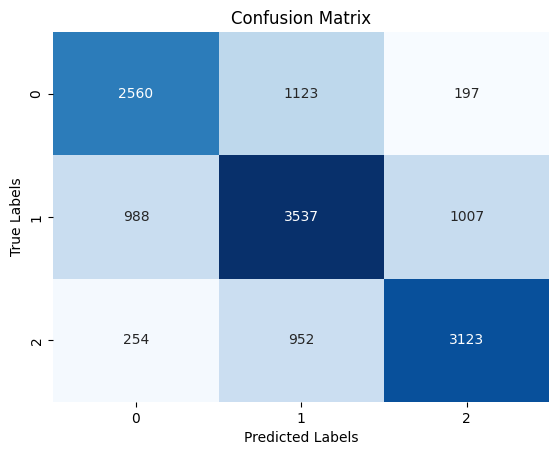

In [148]:
# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()